# Oppgave 1
### Relevante pakker

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Rense dataene

In [3]:
df = pd.read_csv("Data/lego.population.csv", sep = ",", encoding = "latin1")
pd.set_option('display.max_rows', 10)
df

Item_Number                       Set_Name               Theme  Pieces  \
0           41916          Extra Dots - Series 2                DOTS   109.0   
1           41908          Extra Dots - Series 1                DOTS   109.0   
2           11006           Creative Blue Bricks             Classic    52.0   
3           11007          Creative Green Bricks             Classic    60.0   
4           41901         Funky Animals Bracelet                DOTS    33.0   
...           ...                            ...                 ...     ...   
1299        45678                SPIKE Prime Set     LEGO® Education   528.0   
1300        71367          Mario's House & Yoshi  LEGO® Super Mario   205.0   
1301        71368           Toad's Treasure Hunt  LEGO® Super Mario   464.0   
1302        71369    Bowser's Castle Boss Battle  LEGO® Super Mario  1010.0   
1303        71371  Propeller Mario Power-Up Pack  LEGO® Super Mario    13.0   

         Price Amazon_Price  Year      Ages  Pages  Minifigures  Packaging  \
0       $3.99        $3.44   2020   Ages_6+    NaN          NaN  Foil pack   
1       $3.99        $3.99   2020   Ages_6+    NaN          NaN  Foil pack   
2       $4.99        $4.93   2020   Ages_4+   37.0          NaN        Box   
3       $4.99        $4.93   2020   Ages_4+   37.0          NaN        Box   
4       $4.99        $4.99   2020   Ages_6+    NaN          NaN  Foil pack   
...        ...          ...   ...       ...    ...          ...        ...   
1299  $329.95           NaN  2020  Ages_10+    NaN          2.0        NaN   
1300   $29.99           NaN  2020   Ages_6+    NaN          2.0        Box   
1301   $69.99           NaN  2020   Ages_8+    NaN          4.0        Box   
1302   $99.99           NaN  2020   Ages_8+    NaN          NaN        Box   
1303    $9.99           NaN  2020   Ages_6+    NaN          NaN        Box   

     Weight  Unique_Pieces Availability   Size  
0       NaN            6.0       Retail  Small  
1       NaN            6.0       Retail  Small  
2       NaN           28.0       Retail  Small  
3       NaN           36.0       Retail  Small  
4       NaN           10.0       Retail  Small  
...     ...            ...          ...    ...  
1299    NaN          108.0          NaN  Small  
1300    NaN          114.0       Retail  Small  
1301    NaN          195.0       Retail  Small  
1302    NaN          346.0       Retail  Small  
1303    NaN           11.0       Retail  Small  

[1304 rows x 15 columns]

In [4]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

pd.set_option('display.max_rows', 10)

df2

Set_Name             Theme  Pieces   Price  Pages  \
13     Stephanie's Summer Heart Box           Friends    95.0    7.99   40.0   
16                       Woody & RC            Disney    69.0    9.99   28.0   
17           Mia's Summer Heart Box           Friends    85.0    7.99   36.0   
18        Olivia's Summer Heart Box           Friends    93.0    7.99   40.0   
19                Police Patrol Car              City    92.0    9.99   36.0   
...                             ...               ...     ...     ...    ...   
1171                 1989 Batmobile            Batman  3306.0  249.99  404.0   
1172                     Tree House             Ideas  3036.0  199.99  428.0   
1173     Welcome to Apocalypseburg!  THE LEGO MOVIE 2  3178.0  299.99  452.0   
1174  Jurassic Park: T. rex Rampage    Jurassic World  3120.0  249.99  464.0   
1175    Monkie Kid's Team Secret HQ        Monkie Kid  1105.0  169.99  556.0   

      Minifigures  Unique_Pieces  
13            1.0           52.0  
16            1.0           36.0  
17            1.0           41.0  
18            2.0           48.0  
19            1.0           52.0  
...           ...            ...  
1171          3.0          484.0  
1172          4.0          482.0  
1173         13.0          692.0  
1174          6.0          525.0  
1175          7.0          622.0  

[714 rows x 7 columns]

### Sorterer dataen etter tema i alfabetisk rekkefølge - Laget av oss
Blir laget en fil som heter rensetdata.csv når denne blir kjørt 

In [5]:
def sort_csv_by_third_column(file_path):
    # Les inn data fra CSV-filen
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Ta vare på overskriften
        sorted_data = sorted(reader, key=lambda row: row[2])  # Sorter basert på tredje kolonne

    # Skriv den sorterte dataen tilbake til en ny CSV-fil
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)  # Skriv overskriften først
        for row in sorted_data:
            writer.writerow(row)

# Bruk funksjonen på en CSV-fil ved å spesifisere filbanen
df2.to_csv('rensetdata.csv') # Overfører data til ny csv fil
file_path = './rensetdata.csv'
sort_csv_by_third_column(file_path)

### Deler inn i kategoriene fra tidligere

In [6]:
# Gruppere temaer i nye grupper:
# (Varemerke havner i én gruppe, ikke varemerke i en annen, og alle andre i en tredje)
df2['Cat'] = np.where(df2['Theme'].isin(['DC', 'Marvel', 'Batman', 'Spider-Man', 'Minecraft', 'Disney', 'Overwatch', 'Stranger Things', 'Jurassic World', 'Powerpuff Girls', 'Star Wars', 'Trolls World Tour', 'Unikitty', 'Minions', 'Harry Potter', 'LEGO Frozen 2']), 'Varemerke', 
                      np.where(df2['Theme'].isin(['City', 'Classic', 'Creator 3-in-1', 'Creator Expert', 'DUPLO', 'Minifigures', 'Ideas', 'Juniors', 'Monkie Kid', 'Powered UP', 'Speed Champions', 'Hidden Side']), 'Ikke varemerke', 'Uklart'))
df2.groupby(['Cat']).size().reset_index(name = 'Count')


Cat  Count
0  Ikke varemerke    230
1          Uklart    196
2       Varemerke    288

In [7]:
pd.set_option('display.max_rows', 100)
df2.groupby(['Cat', 'Theme']).size().reset_index(name = 'Count')

Cat              Theme  Count
0   Ikke varemerke               City     94
1   Ikke varemerke            Classic      4
2   Ikke varemerke     Creator 3-in-1     21
3   Ikke varemerke     Creator Expert     10
4   Ikke varemerke              DUPLO     32
5   Ikke varemerke        Hidden Side     19
6   Ikke varemerke              Ideas      8
7   Ikke varemerke            Juniors     12
8   Ikke varemerke        Minifigures      3
9   Ikke varemerke         Monkie Kid      9
10  Ikke varemerke         Powered UP      1
11  Ikke varemerke    Speed Champions     17
12          Uklart            Friends     94
13          Uklart            NINJAGO     77
14          Uklart   THE LEGO MOVIE 2     25
15       Varemerke             Batman     16
16       Varemerke                 DC      8
17       Varemerke             Disney     35
18       Varemerke       Harry Potter     22
19       Varemerke     Jurassic World     19
20       Varemerke      LEGO Frozen 2      7
21       Varemerke             Marvel     47
22       Varemerke          Minecraft     21
23       Varemerke            Minions      2
24       Varemerke          Overwatch      7
25       Varemerke    Powerpuff Girls      2
26       Varemerke         Spider-Man      2
27       Varemerke          Star Wars     85
28       Varemerke    Stranger Things      1
29       Varemerke  Trolls World Tour      8
30       Varemerke           Unikitty      6

### Boksplott

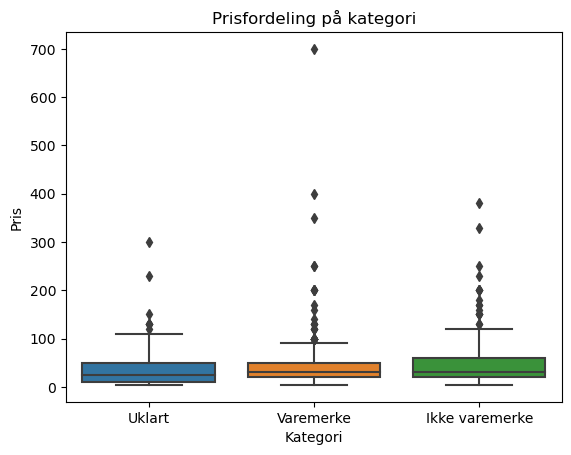

                count       mean        std   min    25%    50%    75%     max
Cat                                                                           
Ikke varemerke  230.0  51.790000  53.377162  3.99  19.99  29.99  59.99  379.99
Uklart          196.0  36.709388  37.776642  3.99   9.99  24.99  49.99  299.99
Varemerke       288.0  48.569861  61.354348  3.99  19.99  29.99  49.99  699.99


In [8]:
# Siden vi allerede har datasettet df2 i minnet, kan vi direkte bruke det:
sns.boxplot(x='Cat', y='Price', data=df2)

# Tillegg titler og akselabeler for klarhet
plt.title('Prisfordeling på kategori')
plt.xlabel('Kategori')
plt.ylabel('Pris')

# Viser plottet
plt.show()

# Statistikk for hver enkelt kategori
stats = df2.groupby('Cat')['Price'].describe()
print(stats)

# Vil gjerne ha litt statistikk på p-verdiene her? 



In [9]:
# informasjon for Varemerke og pris
df_varemerke1 = df2[df2['Cat'] == 'Varemerke']
resultat_varemerke1 = smf.ols('Price ~ Cat', data = df_varemerke1).fit()

resultat_varemerke1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                nan
Time:                        09:51:29   Log-Likelihood:                -1593.8
No. Observations:                 288   AIC:                             3190.
Df Residuals:                     287   BIC:                             3193.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.5699      3.615     13.434      0.000      41.454      55.686
==============================================================================
Omnibus:                      368.041   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30165.583
Skew:                           5.781   Prob(JB):                         0.00
Kurtosis:                      51.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# informasjon for ikke varemerke og pris
df_ikke_varemerke1 = df2[df2['Cat'] == 'Ikke varemerke']
resultat_ikke_varemerke1 = smf.ols('Price ~ Cat', data = df_ikke_varemerke1).fit()

resultat_ikke_varemerke1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                nan
Time:                        09:51:29   Log-Likelihood:                -1240.7
No. Observations:                 230   AIC:                             2483.
Df Residuals:                     229   BIC:                             2487.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.7900      3.520     14.715      0.000      44.855      58.725
==============================================================================
Omnibus:                      154.904   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.692
Skew:                           2.676   Prob(JB):                    1.02e-259
Kurtosis:                      12.788   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# informasjon for uklart og pris
df_uklart1 = df2[df2['Cat'] == 'Uklart']
resultat_uklart1 = smf.ols('Price ~ Pieces', data = df_uklart1).fit()

resultat_uklart1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3298.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.01e-123
Time:                        09:51:29   Log-Likelihood:                -706.16
No. Observations:                 196   AIC:                             1416.
Df Residuals:                     194   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0379      0.821      8.576      0.000       5.419       8.656
Pieces         0.0798      0.001     57.430      0.000       0.077       0.082
==============================================================================
Omnibus:                       59.935   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.294
Skew:                          -0.498   Prob(JB):                    3.82e-266
Kurtosis:                      15.193   Cond. No.                         761.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### A - Pris beskrevet av antall brikker

In [12]:
# enkel lineær regresjon
modell_lr = smf.ols('Price ~ Pieces', data = df2)
resultat_lr = modell_lr.fit()

resultat_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3802.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          9.01e-288
Time:                        09:51:29   Log-Likelihood:                -3194.2
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     712   BIC:                             6401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2338      0.988     10.363      0.000       8.295      12.173
Pieces         0.0873      0.001     61.664      0.000       0.085       0.090
==============================================================================
Omnibus:                      659.458   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.067
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      47.748   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

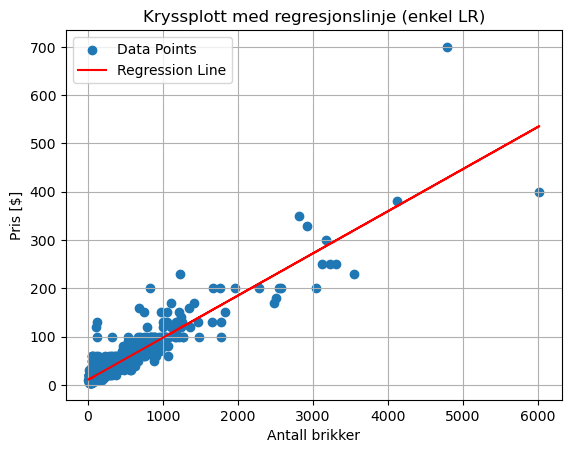

In [13]:
slope = resultat_lr.params['Pieces']
intercept = resultat_lr.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

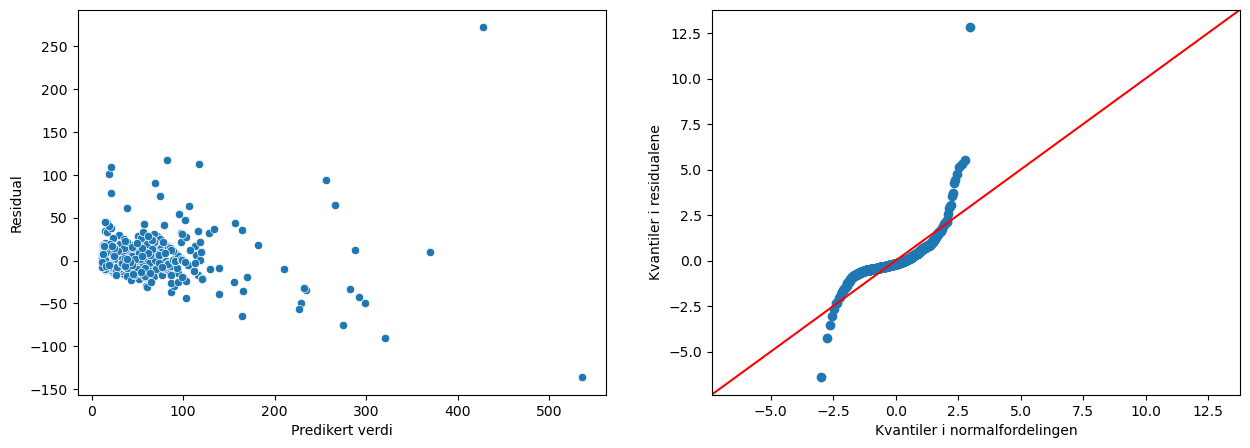

In [14]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat_lr.fittedvalues, y = resultat_lr.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat_lr.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### Pris beskrevet av antall sider i manual

In [15]:
# enkel lineær regresjon
modell_lr_sider = smf.ols('Price ~ Pages', data = df2)
resultat_lr_sider = modell_lr_sider.fit()

resultat_lr_sider.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1177.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          4.85e-153
Time:                        09:51:30   Log-Likelihood:                -3505.1
No. Observations:                 714   AIC:                             7014.
Df Residuals:                     712   BIC:                             7023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4203      1.901     -1.799      0.072      -7.153       0.312
Pages          0.4820      0.014     34.314      0.000       0.454       0.510
==============================================================================
Omnibus:                      831.547   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155473.051
Skew:                           5.307   Prob(JB):                         0.00
Kurtosis:                      74.508   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

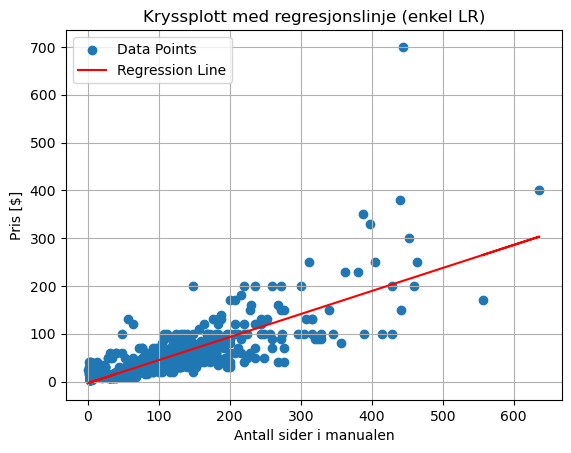

In [16]:
slope = resultat_lr_sider.params['Pages']
intercept = resultat_lr_sider.params['Intercept']

regression_x = np.array(df2['Pages'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pages'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall sider i manualen')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

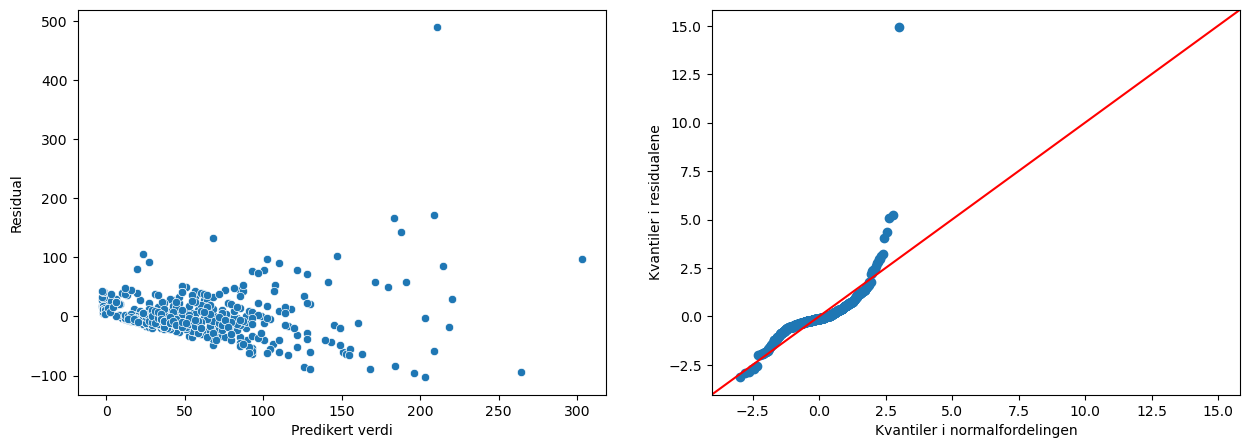

In [17]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat_lr_sider.fittedvalues, y = resultat_lr_sider.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat_lr_sider.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### B - Pris beskrevet av antall brikker og antall sider i manualen 
Jeg er litt usikker på denne, vet ikke helt om alle variablene blir med i grafen.

In [18]:
# multipel lineær regresjon
modell_mlr = smf.ols('Price ~ Pieces + Pages', data = df2)
resultat_mlr = modell_mlr.fit()

resultat_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1970.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.11e-290
Time:                        09:51:30   Log-Likelihood:                -3183.1
No. Observations:                 714   AIC:                             6372.
Df Residuals:                     711   BIC:                             6386.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5142      1.250      5.210      0.000       4.059       8.969
Pieces         0.0780      0.002     32.271      0.000       0.073       0.083
Pages          0.0735      0.016      4.737      0.000       0.043       0.104
==============================================================================
Omnibus:                      746.640   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96426.614
Skew:                           4.487   Prob(JB):                         0.00
Kurtosis:                      59.220   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

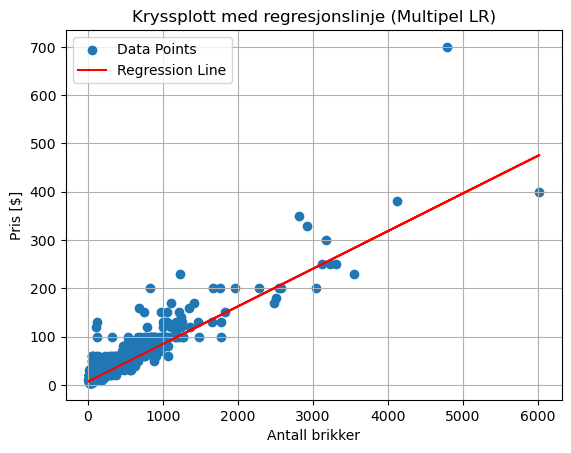

In [19]:
# Henter ut koeffisientene for Pieces og interceptet
slope_pieces = resultat_mlr.params['Pieces']
intercept = resultat_mlr.params['Intercept']

# Beregner forventet pris basert på Pieces alene for å plotte denne variabelen mot pris
regression_x_pieces = np.array(df2['Pieces'])
regression_y_pieces = slope_pieces * regression_x_pieces + intercept

# Plotter datapunktene og regresjonslinjen for 'Pieces'
plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x_pieces, regression_y_pieces, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (Multipel LR)')
plt.legend()
plt.grid()
plt.show()

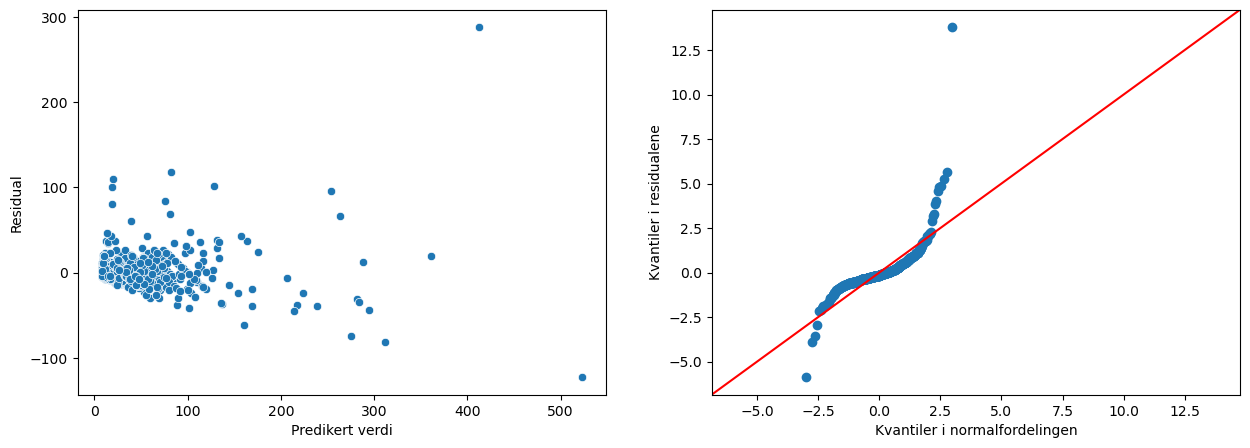

In [20]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat_mlr.fittedvalues, y = resultat_mlr.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat_mlr.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### C - Pris beskrevet av antall brikker, med egne parametere for hver gruppe (Varemerke, ikke varemerke, uklart)

#### A - Egen modell for hver gruppe

For varemerke

In [21]:
df_varemerke = df2[df2['Cat'] == 'Varemerke']
resultat_varemerke = smf.ols('Price ~ Pieces', data = df_varemerke).fit()

resultat_varemerke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1820.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          5.24e-126
Time:                        09:51:30   Log-Likelihood:                -1306.3
No. Observations:                 288   AIC:                             2617.
Df Residuals:                     286   BIC:                             2624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5990      1.631      5.273      0.000       5.389      11.809
Pieces         0.0940      0.002     42.658      0.000       0.090       0.098
==============================================================================
Omnibus:                      251.721   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39094.005
Skew:                           2.692   Prob(JB):                         0.00
Kurtosis:                      59.823   Cond. No.                         904.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

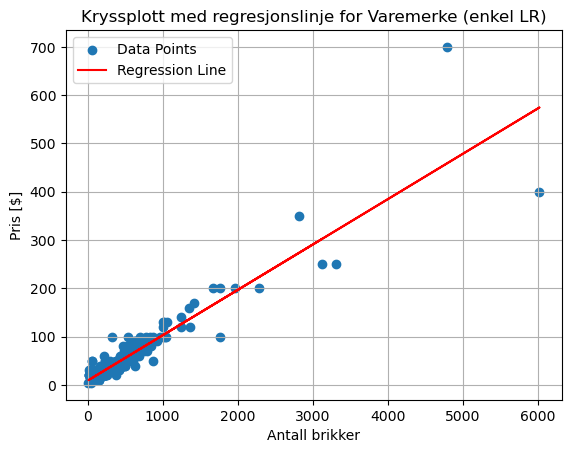

In [22]:
# Hente koeffisientene
slope_varemerke = resultat_varemerke.params['Pieces']
intercept_varemerke = resultat_varemerke.params['Intercept']

# Lage regresjonslinjen
regression_x_varemerke = np.array(df_varemerke['Pieces'])
regression_y_varemerke = slope_varemerke * regression_x_varemerke + intercept_varemerke

# Plotte dataene og regresjonslinjen for 'Varemerke'
plt.scatter(df_varemerke['Pieces'], df_varemerke['Price'], label='Data Points')
plt.plot(regression_x_varemerke, regression_y_varemerke, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje for Varemerke (enkel LR)')
plt.legend()
plt.grid()
plt.show()


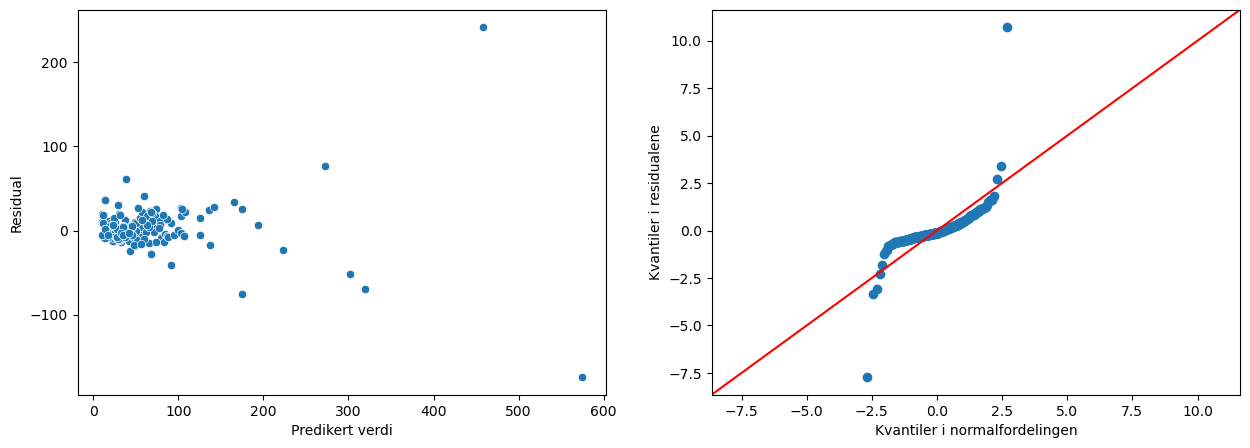

In [23]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat_varemerke.fittedvalues, y = resultat_varemerke.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat_varemerke.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### For ikke varemerke

In [24]:
# multipel lineær regresjon
df_ikke_varemerke = df2[df2['Cat'] == 'Ikke varemerke']
resultat_ikke_varemerke = smf.ols('Price ~ Pieces', data = df_ikke_varemerke).fit()

resultat_ikke_varemerke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     843.5
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           1.44e-78
Time:                        09:51:30   Log-Likelihood:                -1062.7
No. Observations:                 230   AIC:                             2129.
Df Residuals:                     228   BIC:                             2136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4426      2.032      8.092      0.000      12.439      20.446
Pieces         0.0814      0.003     29.043      0.000       0.076       0.087
==============================================================================
Omnibus:                      116.901   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.530
Skew:                           2.055   Prob(JB):                    6.35e-121
Kurtosis:                       9.393   Cond. No.                         906.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

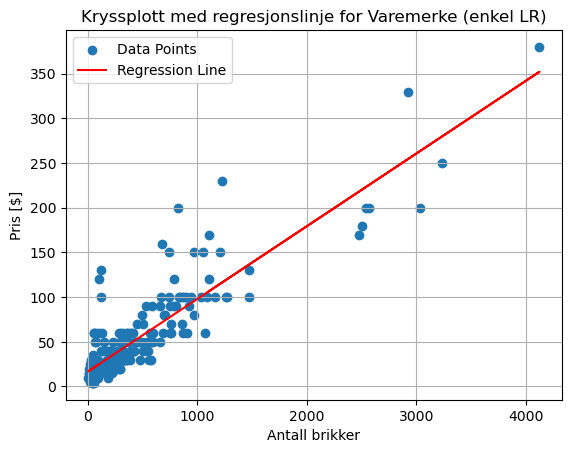

In [25]:
# Hente koeffisientene
slope_ikke_varemerke = resultat_ikke_varemerke.params['Pieces']
intercept_ikke_varemerke = resultat_ikke_varemerke.params['Intercept']

# Lage regresjonslinjen
regression_x_ikke_varemerke = np.array(df_ikke_varemerke['Pieces'])
regression_y_ikke_varemerke = slope_ikke_varemerke * regression_x_ikke_varemerke + intercept_ikke_varemerke

# Plotte dataene og regresjonslinjen for 'Varemerke'
plt.scatter(df_ikke_varemerke['Pieces'], df_ikke_varemerke['Price'], label='Data Points')
plt.plot(regression_x_ikke_varemerke, regression_y_ikke_varemerke, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje for Varemerke (enkel LR)')
plt.legend()
plt.grid()
plt.show()

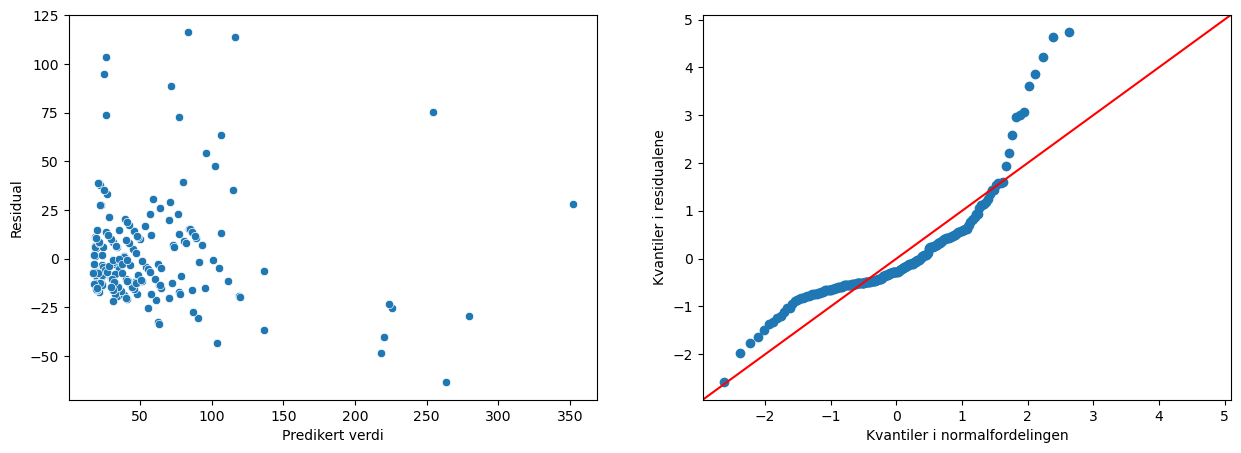

In [26]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat_ikke_varemerke.fittedvalues, y = resultat_ikke_varemerke.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat_ikke_varemerke.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### For uklart

In [27]:
# multipel lineær regresjon
df_uklart = df2[df2['Cat'] == 'Uklart']
resultat_uklart = smf.ols('Price ~ Pieces', data = df_uklart)
resultat_uklart = resultat_uklart.fit()

resultat_uklart.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3298.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.01e-123
Time:                        09:51:30   Log-Likelihood:                -706.16
No. Observations:                 196   AIC:                             1416.
Df Residuals:                     194   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0379      0.821      8.576      0.000       5.419       8.656
Pieces         0.0798      0.001     57.430      0.000       0.077       0.082
==============================================================================
Omnibus:                       59.935   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.294
Skew:                          -0.498   Prob(JB):                    3.82e-266
Kurtosis:                      15.193   Cond. No.                         761.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

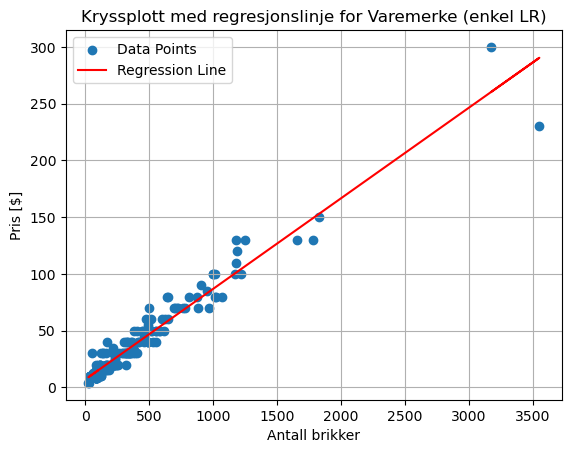

In [28]:
# Hente koeffisientene
slope_uklart = resultat_uklart.params['Pieces']
intercept_uklart = resultat_uklart.params['Intercept']

# Lage regresjonslinjen
regression_x_uklart = np.array(df_uklart['Pieces'])
regression_y_uklart = slope_uklart * regression_x_uklart + intercept_uklart

# Plotte dataene og regresjonslinjen for 'Varemerke'
plt.scatter(df_uklart['Pieces'], df_uklart['Price'], label='Data Points')
plt.plot(regression_x_uklart, regression_y_uklart, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje for Varemerke (enkel LR)')
plt.legend()
plt.grid()
plt.show()

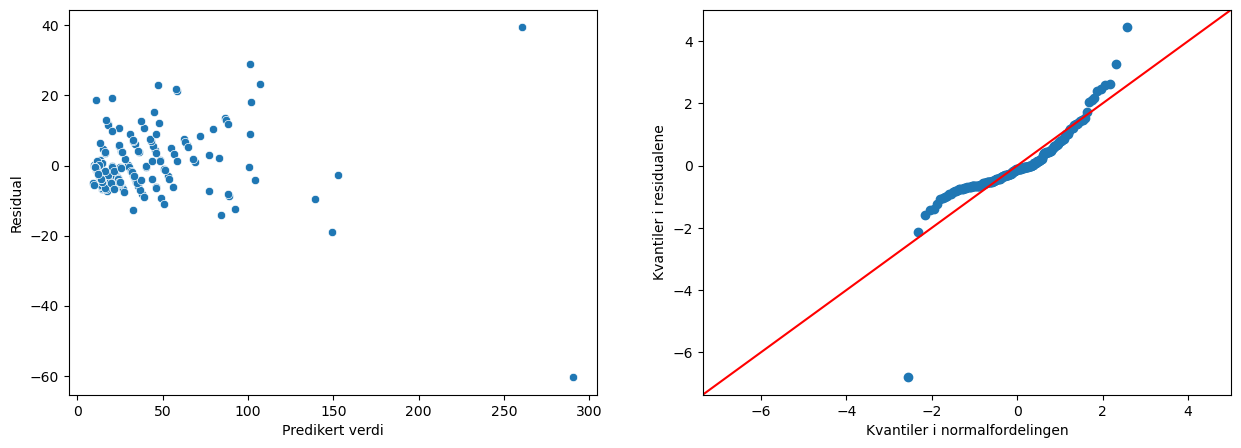

In [29]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat_uklart.fittedvalues, y = resultat_uklart.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat_uklart.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### Kun eget skjæringspunkt 


In [30]:
# enkel lineær regresjon, tar ikke hensyn til cat
res_sub = smf.ols('Price ~ Pieces * Pages' , data = df2).fit()
res_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1312.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          4.70e-289
Time:                        09:51:31   Log-Likelihood:                -3182.9
No. Observations:                 714   AIC:                             6374.
Df Residuals:                     710   BIC:                             6392.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.1418      1.406      4.368      0.000       3.381       8.903
Pieces           0.0800      0.004     18.833      0.000       0.072       0.088
Pages            0.0729      0.016      4.694      0.000       0.042       0.103
Pieces:Pages -4.975e-06   8.59e-06     -0.579      0.562   -2.18e-05    1.19e-05
==============================================================================
Omnibus:                      756.583   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99036.071
Skew:                           4.591   Prob(JB):                         0.00
Kurtosis:                      59.962   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# multippel lineær regresjon med en annen referansekategori
modell_cat_mlr = smf.ols('Price ~ Pieces + Cat' , data = df2).fit()
modell_cat_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1315.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          2.46e-289
Time:                        09:51:31   Log-Likelihood:                -3182.3
No. Observations:                 714   AIC:                             6373.
Df Residuals:                     710   BIC:                             6391.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.9966      1.507      9.288      0.000      11.038      16.955
Cat[T.Uklart]       -9.6601      2.036     -4.745      0.000     -13.657      -5.663
Cat[T.Varemerke]    -2.4332      1.850     -1.315      0.189      -6.066       1.199
Pieces               0.0870      0.001     62.323      0.000       0.084       0.090
==============================================================================
Omnibus:                      663.869   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67930.232
Skew:                           3.723   Prob(JB):                         0.00
Kurtosis:                      50.201   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

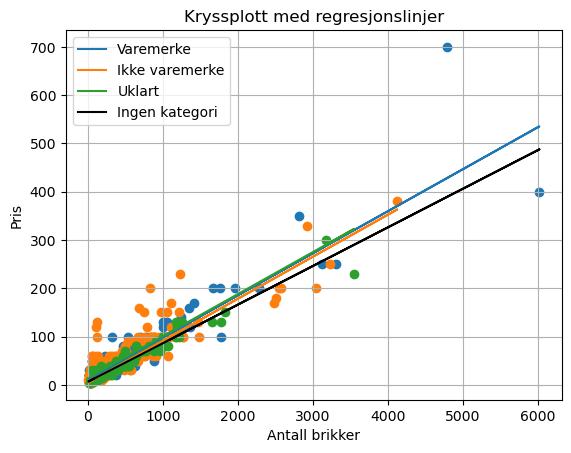

In [32]:

mycat = ['Varemerke', 'Ikke varemerke', 'Uklart']
intercept = [modell_cat_mlr.params['Cat[T.Varemerke]'], modell_cat_mlr.params['Cat[T.Uklart]'], 0] + modell_cat_mlr.params['Intercept']
slope = modell_cat_mlr.params['Pieces']

for i, cat in enumerate(mycat):

    regression_x = np.array(df2[df2['Cat'].isin([cat])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(df2[df2['Cat'].isin([cat])]['Pieces'], df2[df2['Cat'].isin([cat])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=cat)

# uten cat som forklaringsvariabel:
regression_x = np.array(df2['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'Ingen kategori')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

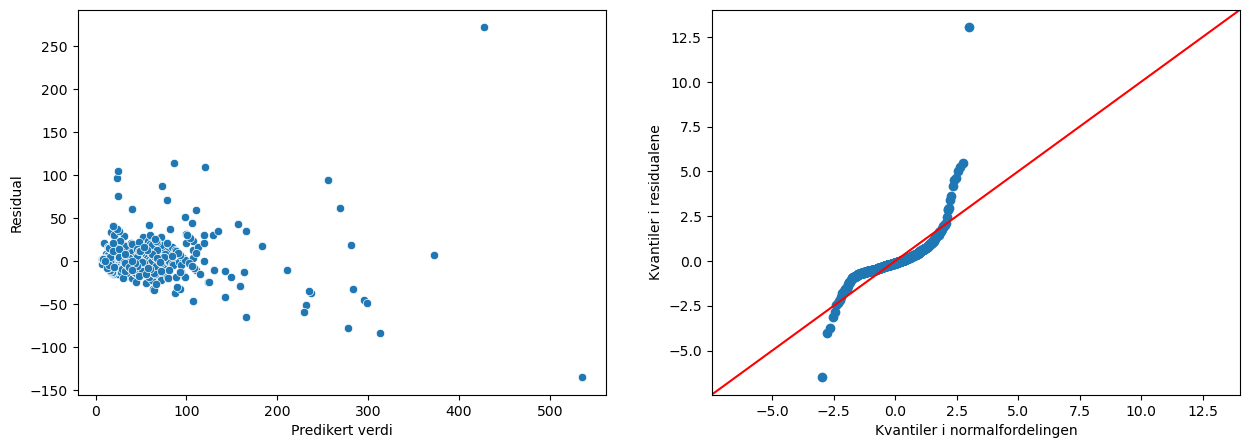

In [33]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell_cat_mlr.fittedvalues, y = modell_cat_mlr.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(modell_cat_mlr.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### Eget skjæringspunkt og stigningstall 

In [34]:
# multippel lineær regresjon med en annen referansekategori
modell_cat_mlr_interact = smf.ols('Price ~ Pieces * Pages * Cat', data=df2).fit()
modell_cat_mlr_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     430.1
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          3.44e-303
Time:                        09:51:31   Log-Likelihood:                -3123.0
No. Observations:                 714   AIC:                             6270.
Df Residuals:                     702   BIC:                             6325.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        13.3898      2.316      5.781      0.000       8.842      17.938
Cat[T.Uklart]                   -10.0056      3.469     -2.884      0.004     -16.817      -3.195
Cat[T.Varemerke]                 -6.1003      3.357     -1.817      0.070     -12.692       0.491
Pieces                            0.0522      0.006      8.154      0.000       0.040       0.065
Pieces:Cat[T.Uklart]              0.0042      0.014      0.299      0.765      -0.023       0.032
Pieces:Cat[T.Varemerke]           0.0959      0.011      9.034      0.000       0.075       0.117
Pages                             0.0869      0.018      4.767      0.000       0.051       0.123
Pages:Cat[T.Uklart]               0.0349      0.046      0.754      0.451      -0.056       0.126
Pages:Cat[T.Varemerke]           -0.2491      0.048     -5.192      0.000      -0.343      -0.155
Pieces:Pages                   4.944e-05   1.76e-05      2.804      0.005    1.48e-05    8.41e-05
Pieces:Pages:Cat[T.Uklart]    -3.254e-05   3.16e-05     -1.028      0.304   -9.47e-05    2.96e-05
Pieces:Pages:Cat[T.Varemerke]    -0.0001   2.09e-05     -6.181      0.000      -0.000   -8.82e-05
==============================================================================
Omnibus:                      593.817   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36569.406
Skew:                           3.255   Prob(JB):                         0.00
Kurtosis:                      37.451   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

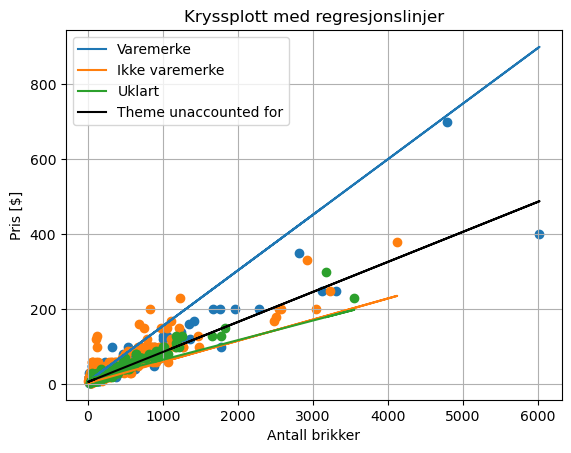

In [35]:
# plott
intercept = [modell_cat_mlr_interact.params['Cat[T.Varemerke]'], modell_cat_mlr_interact.params['Cat[T.Uklart]'], 0] + modell_cat_mlr_interact.params['Intercept']
slope = [modell_cat_mlr_interact.params['Pieces:Cat[T.Varemerke]'], modell_cat_mlr_interact.params['Pieces:Cat[T.Uklart]'], 0] + modell_cat_mlr_interact.params['Pieces']

for i, cat in enumerate(mycat):

    regression_x = np.array(df2[df2['Cat'].isin([cat])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(df2[df2['Cat'].isin([cat])]['Pieces'], df2[df2['Cat'].isin([cat])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=cat)
    
# uten cat som forklaringsvariabel:
regression_x = np.array(df2['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

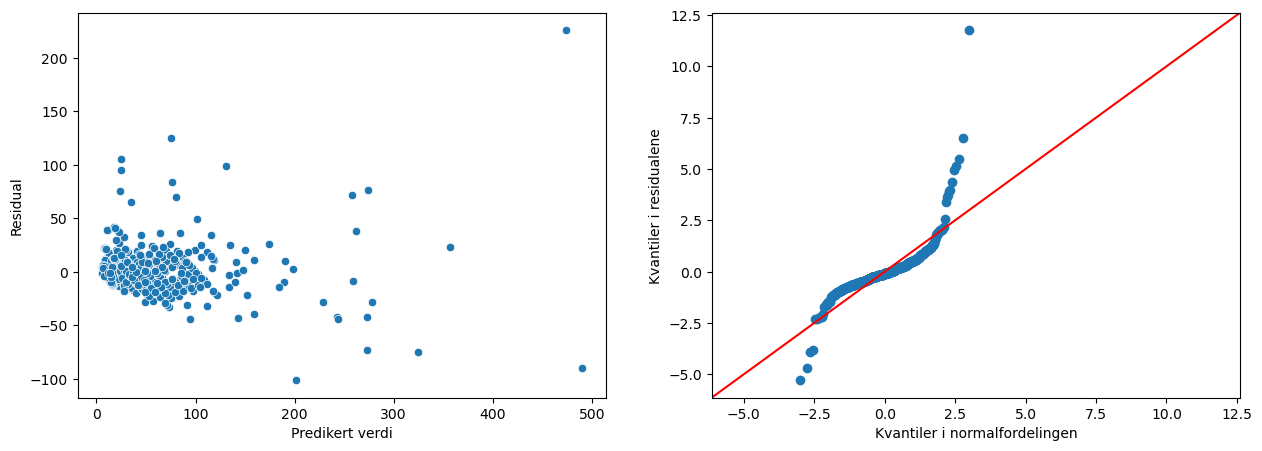

In [36]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell_cat_mlr_interact.fittedvalues, y = modell_cat_mlr_interact.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(modell_cat_mlr_interact.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

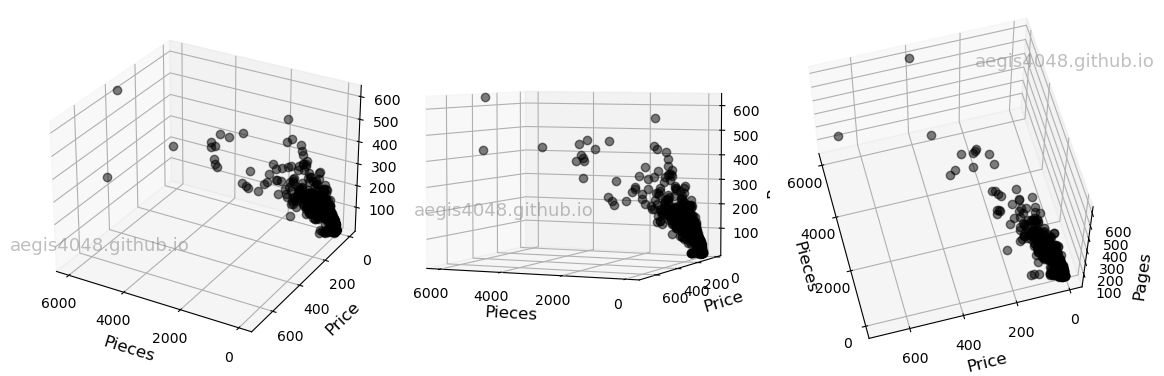

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')

# Anta at df2 er ditt DataFrame og har kolonnene 'Pieces', 'Price', og 'Pages'
# df2 = pd.read_csv('din_datasti.csv')  # Eksempel på hvordan du kan laste inn datasettet

# Bruk kolonnene fra df2
x = df2['Pieces']
y = df2['Price']
z = df2['Pages']

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('Pieces', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.set_zlabel('Pages', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='y')

# Tilpass teksten og visningen
ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center', transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center', transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center', transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

# Oppdater tittelen for å reflektere det som er relevant for din data
# For eksempel, hvis du har en R^2 verdi fra en modell, kan du inkludere den her
# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

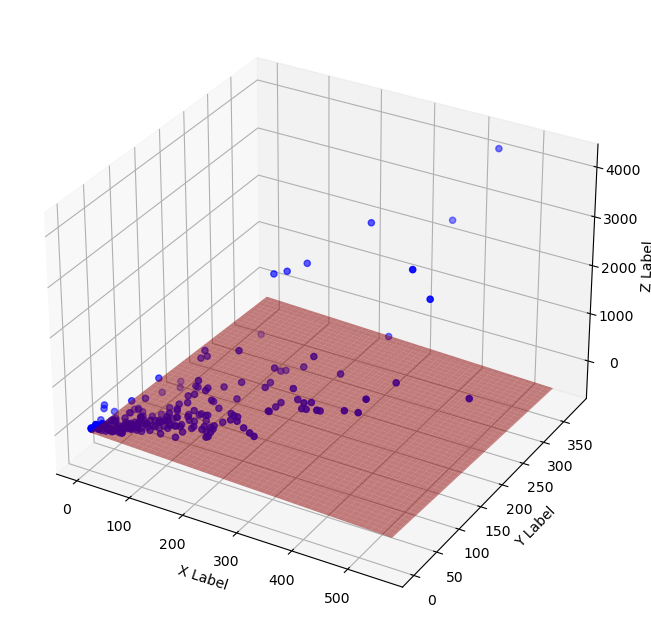

In [38]:
x = df_ikke_varemerke['Pages']
y = df_ikke_varemerke['Price']
z = df_ikke_varemerke['Pieces']

# build the figure instance
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot for data points
ax.scatter(x, y, z, c='blue', marker='o')

# set your labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Define the plane parameters
a, b, c, d = 0.1, 0.2, 0.3, 10  # Adjust these parameters as needed

# Create a meshgrid for the plane
xx, yy = np.meshgrid(range(int(min(x)), int(max(x))), range(int(min(y)), int(max(y))))
zz = (-a * xx - b * yy - d) / c  # Calculate the corresponding z values for the plane

# Plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='red')

plt.show()

NameError: name 'xx_pred' is not defined

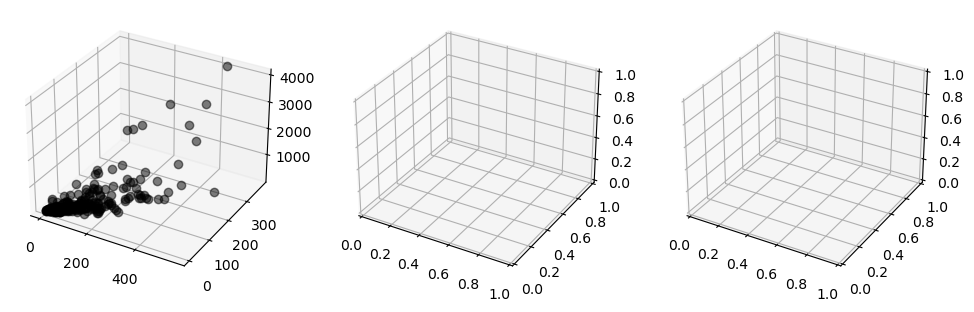

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

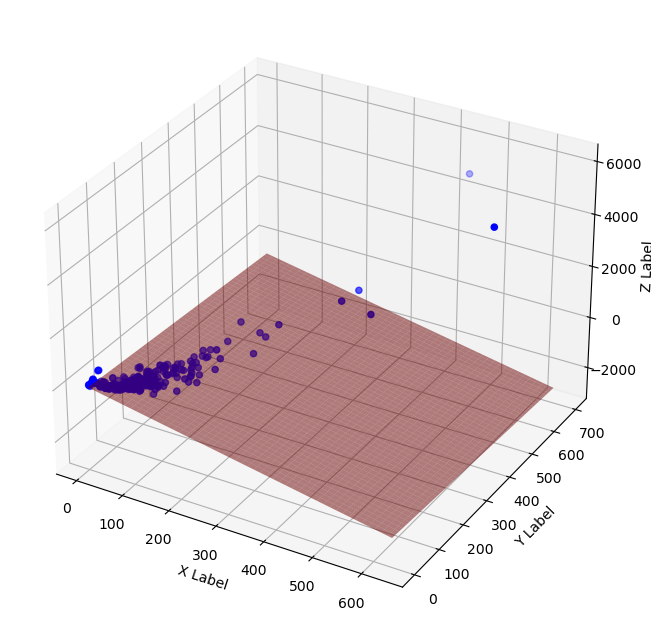

In [ ]:
x = df_varemerke['Pages']
y = df_varemerke['Price']
z = df_varemerke['Pieces']

# build the figure instance
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot for data points
ax.scatter(x, y, z, c='blue', marker='o')

# set your labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Define the plane parameters
a, b, c, d = 1, 0.2, 0.3, 10  # Adjust these parameters as needed

# Create a meshgrid for the plane
xx, yy = np.meshgrid(range(int(min(x)), int(max(x))), range(int(min(y)), int(max(y))))
zz = (-a * xx - b * yy - d) / c  # Calculate the corresponding z values for the plane

# Plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='red')

plt.show()